# Universidad de Buenos Aires
# Deep Learning - Examen
# Agosto 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 27 de Agosto a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen AGOSTO 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.

b. Utilizando SGD y pytorch.

<u>Punto a:</u>

Empiezo haciendo el calculo del gradiente por regla de la cadena:

![b](https://drive.google.com/uc?export=view&id=1WNnt8A0CFawA33EgMfa2w9b7_3dXNibl)

Teniendo en cuenta que: $$m_1 = g(x,y); m_2 = h(x,y); m_3 = j(x,y)$$
<br><br/>
Calculo en gradiente en x:
<br><br/>
$\frac{\partial f}{\partial x} = \Bigl(\frac{\partial z}{\partial m_1} * \frac{\partial m_1}{\partial x}\Bigl) + \Bigl(\frac{\partial z}{\partial m_2} * \frac{\partial m_2}{\partial x}\Bigl) + \Bigl(\frac{\partial z}{\partial m_3} * \frac{\partial m_3}{\partial x}\Bigl)$

$$\Rightarrow\frac{\partial f}{\partial x} = \Bigl(2m_1 * (-1+y)\Bigl) + \Bigl(2m_2 * (-1+y^2)\Bigl) + \Bigl(2m_3 * (-1+y^3)\Bigl)$$

<br><br/>
Calculo en gradiente en y:
<br><br/>
$\frac{\partial f}{\partial y} = \Bigl(\frac{\partial z}{\partial m_1} * \frac{\partial m_1}{\partial y}\Bigl) + \Bigl(\frac{\partial z}{\partial m_2} * \frac{\partial m_2}{\partial y}\Bigl) + \Bigl(\frac{\partial z}{\partial m_3} * \frac{\partial m_3}{\partial y}\Bigl)$


$\frac{\partial f}{\partial y} = \Bigl(2m_1 * (x)\Bigl) + \Bigl(2m_2 * (2xy)\Bigl) + \Bigl(2m_3 * (3xy^2)\Bigl)$

$$\Rightarrow \frac{\partial f}{\partial y} = 2m_1x + 4m_2xy + 6m_3xy^2$$




In [1]:
import numpy as np
import torch
from torch import optim
from matplotlib import pyplot as plt

In [2]:
# Defino los parametros para comparar metodos
epoch = 10000
learn_rate = 0.001
tolerance = 0.01

Punto inicial:
x = 0.910684957012485 
y = 0.31496245585249305

Epocas para converger: 8204

Valor final de salida: 0.0 - (0.00016527158189465744)

valor final de grad_x : -0.009999688219750296
valor final de grad_y : -0.0025655089198559217

Punto minimo:
x = 3.0 
y = 0.5

GRAFICO


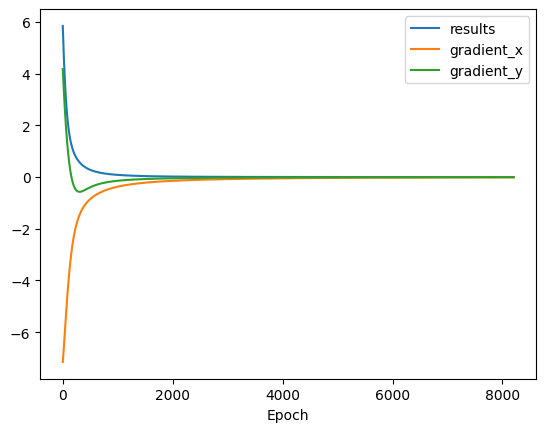

In [3]:
# Determino los puntos iniciales ne formar random
x, y = np.random.random(size=1)[0] , np.random.random(size=1)[0]

print('Punto inicial:')
print(f'x = {x} \ny = {y}\n')

# Defino las funciones segun lo indicado antes
def g_xy(x,y):
    res = 1.5- x + np.multiply(x,y)
    return res

def h_xy(x,y):
    res = 2.25 - x + np.multiply(x,np.power(y,2))
    return res

def j_xy(x,y):
    res = 2.625 - x + np.multiply(x,np.power(y,3))
    return res

# Inicializo las listas para guardar los resultados
results = []
gradient_x = []
gradient_y = []

for i in range(epoch):
  # paso forward
  m1 = g_xy(x,y)
  m2 = h_xy(x,y)
  m3 = j_xy(x,y)
  result = np.power(m1,2) + np.power(m2,2) + np.power(m3,2)

  # paso backward (calculo gradiente)
  grad_x = (np.multiply(np.multiply(2, m1), (-1 + y)) +
            np.multiply(np.multiply(2, m2), (-1 + np.power(y,2))) +
            np.multiply(np.multiply(2, m3), (-1 + np.power(y,3))))

  grad_y = (np.multiply(np.multiply(2,m1), x) +
            np.multiply(np.multiply(4,m2), np.multiply(x,y)) +
            np.multiply(np.multiply(6,m3), np.multiply(x,np.power(y,2))))

  #Guardo los resultados
  results.append(result)
  gradient_x.append(grad_x)
  gradient_y.append(grad_y)

  # Verifico si estamos dentro de la tolerancia
  if (abs(grad_x) < tolerance) & (abs(grad_y) < tolerance):
    break

  # Actualizo
  x -= learn_rate * grad_x
  y -= learn_rate * grad_y

print(f'Epocas para converger: {i}\n')
print(f'Valor final de salida: {round(result,1)} - ({result})\n')
print(f'valor final de grad_x : {grad_x}')
print(f'valor final de grad_y : {grad_y}\n')
print('Punto minimo:')
print(f'x = {round(x,1)} \ny = {round(y,1)}\n')

# Grafico
results = np.array(results)
gradient_x = np.array(gradient_x)
gradient_y = np.array(gradient_y)
plt.plot(results, label='results')
plt.plot(gradient_x, label='gradient_x')
plt.plot(gradient_y, label='gradient_y')
plt.xlabel('Epoch')
plt.legend()
print('GRAFICO')

<u>Punto b:</u>

Ahora realizo el calculo SGD y pytorch

Punto inicial:
x = 0.31354957818984985 
y = 0.9434923529624939

Epocas para converger: 8304

Valor final de salida: 0.0 - (0.00016519316704943776)

valor final de grad_x_torch : -0.009997747838497162
valor final de grad_x_torch : -0.002562887966632843

Punto minimo:
x = 3.0 
y = 0.5

GRAFICO


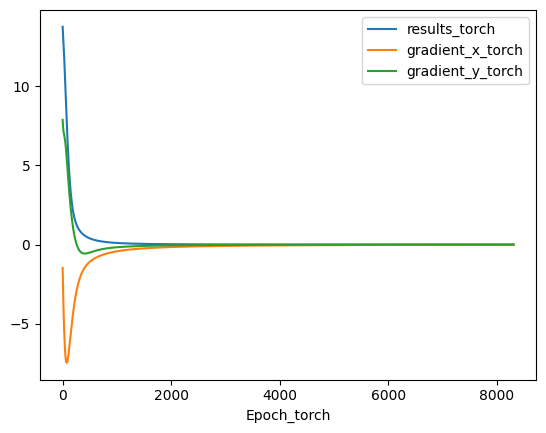

In [4]:
# Determino los puntos iniciales ne formar random
tensor = torch.rand(2, requires_grad=True)
print('Punto inicial:')
print(f'x = {tensor[0]} \ny = {tensor[1]}\n')

# Defino el optimizador SGD
opt = optim.SGD([tensor], lr=learn_rate)

# Inicializo las listas para guardar los resultados
results_torch = []
gradient_x_torch = []
gradient_y_torch = []

for i in range(epoch):
  # Limpio optimizer para empezar un nuevo cálculo de gradiente
  opt.zero_grad()

  # paso forward
  x = tensor[0]
  y = tensor[1]
  result = (torch.pow(1.5- tensor[0] + tensor[0]*tensor[1], 2) +
            torch.pow(2.25 - tensor[0] + tensor[0]*torch.pow(tensor[1],2),2) +
            torch.pow(2.625 - tensor[0] + tensor[0]*torch.pow(tensor[1],3),2))

  # paso backward (calculo gradiente)
  result.backward()
  grad_x_torch = tensor.grad[0]
  grad_y_torch = tensor.grad[1]

  #Guardo los resultados
  results_torch.append(result.detach().numpy())
  gradient_x_torch.append(grad_x_torch)
  gradient_y_torch.append(grad_y_torch)

  # Verifico si estamos dentro de la tolerancia
  if (torch.abs(grad_x_torch) < tolerance) & (torch.abs(grad_y_torch) < tolerance):
    break

  # Actualizo
  opt.step()

print(f'Epocas para converger: {i}\n')
print(f'Valor final de salida: {torch.round(result,decimals=1)} - ({result})\n')
print(f'valor final de grad_x_torch : {grad_x_torch}')
print(f'valor final de grad_x_torch : {grad_y_torch}\n')
print('Punto minimo:')
print(f'x = {torch.round(x,decimals=1)} \ny = {torch.round(y,decimals=1)}\n')

# Grafico
results_torch = np.array(results_torch)
gradient_x_torch = np.array(gradient_x_torch)
gradient_y_torch = np.array(gradient_y_torch)
plt.plot(results_torch, label='results_torch')
plt.plot(gradient_x_torch, label='gradient_x_torch')
plt.plot(gradient_y_torch, label='gradient_y_torch')
plt.xlabel('Epoch_torch')
plt.legend()
print('GRAFICO')

## Se puede ver como ambos metodos convergen al mismo punto y en similar cantidad de epocas

## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?






In [5]:
import torch
import random

#Defino las capas con las caracteristicas
conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 7, padding = 2, stride=1)
conv2 = torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, padding = 0, stride=1)
act = torch.nn.Tanh()
pool = torch.nn.MaxPool2d(kernel_size = 5, stride=5, padding=0, ceil_mode=False)

#Genero la imagen
imagen = torch.rand(1, 3, 1024, 720)
# dimensiones: (N, #filtros, H_out, W_out)
print(f'Tamaño de la imagen a procesar: {imagen.shape}\n')

# Aplico cascada indicada
x = conv1(imagen)
x = conv2(x)
x = act(x)
x = pool(x)
print(f'Punto a: \nTamaño final de la salida: {x.shape}')
print(f'Cantidad de canales: {x.shape[1]}\n')

# agrego la fc
print('Punto b: \nAgrego fully_connected para clasificar 3 clases')
in_features = x.shape[1]*x.shape[2]*x.shape[3]
out_features = 3
fc = torch.nn.Linear(in_features = in_features, out_features = out_features)
salida = fc(x.view(x.shape[0], -1))
print(f'Tamaño de "in_features": {in_features}')
print(f'Tamaño de "out_features": {out_features}')
print(f'salida final de la fully_connected: {salida.shape}\n')

# Verifico el numero de parametros
print('\nVerifico el número de parametros:\n')
total = torch.tensor([0])

for layer in [conv1, conv2, fc]:
  kernel = torch.tensor(layer.weight.shape)
  bias = torch.tensor(layer.bias.shape)
  total += torch.prod(kernel) + bias
  print(f'Layer: {layer}')
  print(f'Kernel o parámetros: {kernel}')
  print(f'Bias: {bias}')
  print(f'Total: {total}\n')


Tamaño de la imagen a procesar: torch.Size([1, 3, 1024, 720])

Punto a: 
Tamaño final de la salida: torch.Size([1, 32, 203, 142])
Cantidad de canales: 32

Punto b: 
Agrego fully_connected para clasificar 3 clases
Tamaño de "in_features": 922432
Tamaño de "out_features": 3
salida final de la fully_connected: torch.Size([1, 3])


Verifico el número de parametros:

Layer: Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(2, 2))
Kernel o parámetros: tensor([16,  3,  7,  7])
Bias: tensor([16])
Total: tensor([2368])

Layer: Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
Kernel o parámetros: tensor([32, 16,  5,  5])
Bias: tensor([32])
Total: tensor([15200])

Layer: Linear(in_features=922432, out_features=3, bias=True)
Kernel o parámetros: tensor([     3, 922432])
Bias: tensor([3])
Total: tensor([2782499])



## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$
<br><br/>
Considero las 3 muestras secuenciadas como $t_1, t_2, t_3$
<br><br/>
$t_1 \rightarrow x(t_1):$
<br><br/>
Estado oculto de la muestra 1

$ h1(t_1) = w_{xh1} * x(t_1) + w_{h1h1} * h1(0) + w_{h2h1} * h2(0)+ bh1$

$ h1(t_1) = w_{xh1} * x(t_1) + bh1 $
<br><br/>
$ h2(t_1) = w_{xh1} * x(t_1) + w_{h2h2} * h2(0) + w_{h1h2} * h1(0)+ bh2$

$ h2(t_1) = w_{xh2} * x(t_1) + bh2 $

<br><br/>
Salida muestra 1 $$ \Rightarrow \hat{y}(t_1) = w_{h1y} * [w_{xh1} * x(t_1) + bh1] + w_{h2y} *
[w_{xh2} * x(t_1) + bh2] + by $$

<br><br/>
$t_2 \rightarrow x(t_2):$
<br><br/>
Estado oculto de la muestra 2

$ h1(t_2) = w_{xh1} * x(t_2) + w_{h1h1} * h1(t_1) + w_{h2h1} * h2(t_1)+ bh1$

$ h1(t_2) = w_{xh1} * x(t_2) + w_{h1h1} * \Bigl[w_{xh1} * x(t_1) + bh1\Bigl] + w_{h2h1} * \Bigl[w_{xh2} * x(t_1) + bh2\Bigl] + bh1 $
<br><br/>
$ h2(t_2) = w_{xh2} * x(t_2) + w_{h2h2} * h2(t_1) + w_{h1h2} * h1(t_1)+ bh2 $

$ h2(t_2) = w_{xh2} * x(t_2) + w_{h2h2} * \Bigl[w_{xh2} * x(t_1) + bh2 \Bigl] + w_{h1h2} * \Bigl[w_{xh1} * x(t_1) + bh1\Bigl] + bh2$

<br><br/>
Salida muestra 2 $$ \Rightarrow \hat{y}(t_2) = w_{h1y} * h1(t_2) + w_{h2y} * h2(t_2) + by $$
<br><br/>

$$ \hat{y}(t_2) = w_{h1y} * \Bigl(w_{xh1} * x(t_2) + w_{h1h1} * \bigl[w_{xh1} * x(t_1) + bh1 \bigl] + w_{h2h1} * \bigl[w_{xh2} * x(t_1) + bh2\bigl] + bh1 \Bigl) + w_{h2y} * \Bigl(w_{xh2} * x(t_2) + w_{h2h2} * \bigl[w_{xh2} * x(t_1) + bh2\bigl] + w_{h1h2} * \bigl[w_{xh1} * x(t_1) + bh1 \bigl] + bh2 \Bigl) + by $$

<br><br/>
$t_3 \rightarrow x(t_3):$
<br><br/>
Estado oculto de la muestra 3

$ h1(t_3) = w_{xh1} * x(t_3) + w_{h1h1} * h1(t_2) + w_{h2h1} * h2(t_2)+ bh1 $

$ h1(t_3) = w_{xh1} * x(t_3) + w_{h1h1} * \Bigl(w_{xh1} * x(t_2) + w_{h1h1} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + w_{h2h1} * \bigl[w_{xh2} * x(t_1) + bh2\bigl] + bh1\Bigl) + w_{h2h1} * \Bigl(w_{xh2} * x(t_2) + w_{h2h2} * \bigl[w_{xh2} * x(t_1) + bh2 \bigl] + w_{h1h2} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + bh2 \Bigl) + bh1 $
<br><br/>
$ h2(t_3) = w_{xh2} * x(t_3) + w_{h2h2} * h2(t_2) + w_{h1h2} * h1(t_2)+ bh2 $

$ h2(t_3) = w_{xh2} * x(t_3) + w_{h2h2} * \Bigl(w_{xh2} * x(t_2) + w_{h2h2} * \bigl[w_{xh2} * x(t_1) + bh2 \bigl] + w_{h1h2} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + bh2\Bigl) + w_{h1h2} * \Bigl(w_{xh1} * x(t_2) + w_{h1h1} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + w_{h2h1} * \bigl[w_{xh2} * x(t_1) + bh2\bigl] + bh1\Bigl)+ bh2 $

<br><br/>
Salida muestra 3 $$ \Rightarrow \hat{y}(t_3) = w_{h1y} * h1(t_3) + w_{h2y} * h2(t_3) + by $$
<br><br/>

$$ \hat{y}(t_3) = w_{h1y} * \biggl\{w_{xh1} * x(t_3) + w_{h1h1} * \Bigl(w_{xh1} * x(t_2) + w_{h1h1} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + w_{h2h1} * \bigl[w_{xh2} * x(t_1) + bh2\bigl] + bh1\Bigl) + w_{h2h1} * \Bigl(w_{xh2} * x(t_2) + w_{h2h2} * \bigl[w_{xh2} * x(t_1) + bh2 \bigl] + w_{h1h2} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + bh2 \Bigl) + bh1 \biggl\} + w_{h2y} * \biggl\{w_{xh2} * x(t_3) + w_{h2h2} * \Bigl(w_{xh2} * x(t_2) + w_{h2h2} * \bigl[w_{xh2} * x(t_1) + bh2 \bigl] + w_{h1h2} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + bh2\Bigl) + w_{h1h2} * \Bigl(w_{xh1} * x(t_2) + w_{h1h1} * \bigl[w_{xh1} * x(t_1) + bh1\bigl] + w_{h2h1} * \bigl[w_{xh2} * x(t_1) + bh2\bigl] + bh1\Bigl)+ bh2\biggl\} + by $$

## Ejercicio 4



Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.
- d) Compare el score de cada modelo.



In [83]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

In [84]:
# Cargo el dataset
url=' https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing'
url=' https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

In [85]:
df = data.copy()
print(f'Numero de features: {df.shape[1]}')
print(f'Numero de observaciones: {df.shape[0]}\n')
df.head(5)

Numero de features: 12
Numero de observaciones: 550068



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [87]:
#verifico los valores nulos
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [88]:
# Cambio los valores nulos por 0 y cambio el tipo de variable por 'int64'
df.loc[df['Product_Category_2'].isnull(), 'Product_Category_2'] = 0
df.loc[df['Product_Category_3'].isnull(), 'Product_Category_3'] = 0
df[['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].astype('int64')
df.isnull().sum()

# # Elimino las columnas con valores nulos (Realizado para verificar si mejoraban los resultados con embedding)
# df = df.drop(columns=['Product_Category_2','Product_Category_3'])

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [89]:
# Realizo 'one hot encoding' para la columna 'Gender'
df = pd.get_dummies(df, columns=['Gender'], dtype=int)

# # Alternativa reemplazo de valores
# df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})

In [90]:
# Verifico los valores unicos por feature
df.nunique()

User_ID                        5891
Product_ID                     3631
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
Gender_F                          2
Gender_M                          2
dtype: int64

In [91]:
df['Age'].value_counts().sort_index()

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

In [92]:
# Etiqueto las edados por el valor mas bajo del rango, tambien reemplazo 0 por 10
df['Age'] = df['Age'].replace('0', '10', regex=True)
df['Age'] = df.Age.str.extract('(\d+)').astype('int')
df['Age'].value_counts().sort_index()

10     15102
18     99660
26    219587
36    110013
46     45701
51     38501
55     21504
Name: Age, dtype: int64

In [93]:
# Verifico los valores de 'Stay_In_Current_City_Years'
df['Stay_In_Current_City_Years'].value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [94]:
# Cambio solo el valor 4+ por 4 y cambio el tipo de variable
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4, regex=True).astype('int64')
df['Stay_In_Current_City_Years'].value_counts().sort_index()

0     74398
1    193821
2    101838
3     95285
4     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [95]:
# Verifico los valores de 'City_Category'
df['City_Category'].value_counts().sort_index()

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

In [96]:
# Etiqueto los valores de 'City_Category'
df['City_Category'] = df['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})

# Modifico los valores de la columna 'Product_ID' para que quede solo valores numericos
df['Product_ID'] = df['Product_ID'].str.replace('P00','').astype('int64')

# Verifico que todas las columnas tengan valores numericos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     550068 non-null  int64
 1   Product_ID                  550068 non-null  int64
 2   Age                         550068 non-null  int64
 3   Occupation                  550068 non-null  int64
 4   City_Category               550068 non-null  int64
 5   Stay_In_Current_City_Years  550068 non-null  int64
 6   Marital_Status              550068 non-null  int64
 7   Product_Category_1          550068 non-null  int64
 8   Product_Category_2          550068 non-null  int64
 9   Product_Category_3          550068 non-null  int64
 10  Purchase                    550068 non-null  int64
 11  Gender_F                    550068 non-null  int64
 12  Gender_M                    550068 non-null  int64
dtypes: int64(13)
memory usage: 54.6 MB


In [97]:
# Codifico el target 'Purchase' como 0 para valores menores a 9000 y 1 mayores o
# iguales a 9000 de esta manera binarizo el target
df.loc[df['Purchase'] < 9000, 'Purchase'] = 0
df.loc[df['Purchase'] >= 9000, 'Purchase'] = 1

In [98]:
# Chequeo los valores unicos por cada feature
for cat in list(df.columns[2:]):
    print(cat, ':', set(df[cat]))

Age : {36, 10, 46, 18, 51, 55, 26}
Occupation : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
City_Category : {1, 2, 3}
Stay_In_Current_City_Years : {0, 1, 2, 3, 4}
Marital_Status : {0, 1}
Product_Category_1 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Product_Category_2 : {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
Product_Category_3 : {0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
Purchase : {0, 1}
Gender_F : {0, 1}
Gender_M : {0, 1}


In [99]:
df.head()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
0,1000001,69042,10,10,1,2,0,3,0,0,0,1,0
1,1000001,248942,10,10,1,2,0,1,6,14,1,1,0
2,1000001,87842,10,10,1,2,0,12,0,0,0,1,0
3,1000001,85442,10,10,1,2,0,12,14,0,0,1,0
4,1000002,285442,55,16,3,4,0,8,0,0,0,0,1


In [100]:
# Guardo 'User_ID' y 'Product_ID' para utilizar como embedding
user_id = df['User_ID']
product_id = df['Product_ID']

# divido el data set entre features(x) y target(y)
x = df.drop(columns=['User_ID','Product_ID','Purchase'])
y = df['Purchase'].copy()

### Teniendo el dataset preparado voy a utilizar la metodología de división, normalización y entrenamiento de la red neuronal según la notebook vista en clase



In [101]:
# Normalizo
x = x.to_numpy()
y = y.to_numpy()
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0 ) - np.min(x, axis=0))

In [102]:
# Divido el dataset y test (70-15-15)
porc_train = 0.7
porc_val_test = 0.15
idx = np.random.permutation(x_norm.shape[0])
train_idx = idx[0:int(porc_train*len(idx))]
valid_idx = idx[int(porc_train*len(idx)):int((porc_train+porc_val_test)*len(idx))]
test_idx = idx[int((porc_val_test+porc_val_test)*len(idx)):]

train_x = x_norm[train_idx]
train_y = y[train_idx]
valid_x = x_norm[valid_idx]
valid_y = y[valid_idx]
test_x = x_norm[valid_idx]
test_y = y[valid_idx]

n_train = train_x.shape[0]
n_valid = valid_x.shape[0]
n_test = test_x.shape[0]

In [103]:
# Verifico la correcta divición
print(f'train split: {train_x.shape[0]/(train_x.shape[0] + valid_x.shape[0] + test_x.shape[0]):.0%}')
print(f'valid split: {valid_x.shape[0]/(train_x.shape[0] + valid_x.shape[0] + test_x.shape[0]):.0%}')
print(f'test split: {test_x.shape[0]/(train_x.shape[0] + valid_x.shape[0] + test_x.shape[0]):.0%}')

train split: 70%
valid split: 15%
test split: 15%


## <u>Punto a:</u>

Creo la red neuronal sin embedding

In [104]:
# Creo la clase MyDataset como fue indicado
class MyDataset(Dataset):

  #__init__ guarda el dataset en una variable de clase
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
  def __len__(self):
    return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [105]:
# Creo el dataset de entrenamiento
train_ds = MyDataset(train_x, train_y)
# Creo el dataset de validación
valid_ds = MyDataset(valid_x, valid_y)
# Creo el dataset de test
test_ds = MyDataset(test_x, test_y)

# Verifico la cantidad de features para usar en la arquitectura de NNet
in_features = len(train_ds[20][0])
print('in_features: ', in_features)

in_features:  10


In [106]:
# Creo los DataLoader para entregar los dataset de a batches
train_dataloader = DataLoader(train_ds, batch_size = 1024, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size = 1024)
test_dataloader = DataLoader(test_ds, batch_size = 1024)

# Verifico el dataloader
batch_1 = next(iter(train_dataloader))
batch_1[1].shape

torch.Size([1024])

In [107]:
# Verifico que el tipo es correcto
print(type(batch_1[0]))

<class 'torch.Tensor'>


### Arquitectura NNet Pytorch

In [108]:
class NNet(torch.nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=in_features, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 100, out_features= 1, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [109]:
# Instancio la red
nnet = NNet()
# Verifico
print(nnet)

NNet(
  (linear_1): Linear(in_features=10, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (output): Linear(in_features=100, out_features=1, bias=True)
)


In [110]:
# Imprimo la cantidad de parámetros optimizables de la red
print(f'cantidad de parámetros optimizables: {sum(p.numel() for p in nnet.parameters())}')

cantidad de parámetros optimizables: 22401


In [111]:
# Como loss function utilizo BCE por ser un problema de clasificación binaria
#la función sigmoid de salida no se definió en la arquitectura de la red neuronal porque utilizo BCEWithLogitsLoss
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Como optimizador utilizo Adam
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)

In [112]:
# Verifico la opcion de utilizar GPU
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

device

'cuda:0'

In [113]:
# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)

Utilizo como base de iteración del entrenamiento y validación el código visto en clase

In [114]:
# cantidad de epochs
epochs = 30

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):

  ############################################
  ## Entrenamiento
  ############################################
  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []

  for i,data in enumerate(train_dataloader):
    # Obtengo los datos del batch de entrenamiento
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)

    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.450 / 0.375 | Train/Valid accuracy: 0.793 / 0.834
 Epoch 1 | Train/Valid loss: 0.361 / 0.357 | Train/Valid accuracy: 0.845 / 0.847
 Epoch 2 | Train/Valid loss: 0.352 / 0.350 | Train/Valid accuracy: 0.849 / 0.849
 Epoch 3 | Train/Valid loss: 0.346 / 0.359 | Train/Valid accuracy: 0.852 / 0.835
 Epoch 4 | Train/Valid loss: 0.345 / 0.344 | Train/Valid accuracy: 0.852 / 0.853
 Epoch 5 | Train/Valid loss: 0.342 / 0.336 | Train/Valid accuracy: 0.852 / 0.856
 Epoch 6 | Train/Valid loss: 0.343 / 0.421 | Train/Valid accuracy: 0.854 / 0.817
 Epoch 7 | Train/Valid loss: 0.334 / 0.352 | Train/Valid accuracy: 0.858 / 0.845
 Epoch 8 | Train/Valid loss: 0.321 / 0.327 | Train/Valid accuracy: 0.863 / 0.860
 Epoch 9 | Train/Valid loss: 0.319 / 0.318 | Train/Valid accuracy: 0.864 / 0.865
 Epoch 10 | Train/Valid loss: 0.319 / 0.318 | Train/Valid accuracy: 0.864 / 0.865
 Epoch 11 | Train/Valid loss: 0.319 / 0.318 | Train/Valid accuracy: 0.863 / 0.865
 Epoch 12 | Train/Valid lo

In [115]:
nnet.train(False)

test_y_hat = []
test_y = []

for i,data in enumerate(test_dataloader):
  # Obtengo los datos del batch de validación
  x_batch, y_batch = data
  # Copio el batch al dispositivo donde entreno la red neuronal
  x_batch = x_batch.to(device).float()
  y_batch = y_batch.to(device).float().reshape(-1, 1)

  # Paso forward
  nnet_output = nnet(x_batch)
  y_batch_hat = torch.sigmoid(nnet_output)

  # Calculo el loss
  loss = loss_function(nnet_output, y_batch)

  # En validación no hago backpropagation!!

  # Almaceno los valores reales y mis predicciones para cálcular las métricas
  test_y += list(y_batch.detach().cpu().numpy())
  test_y_hat += list(y_batch_hat.detach().cpu().numpy())

# Cálculo la métrica
test_accuracy = metrics.accuracy_score(test_y, [j>=0.5 for j in test_y_hat])
print(f'test_accuracy:  {test_accuracy:.2%}')

test_accuracy:  86.41%


Se puede ver que la red se entrenó correctamente, viendo que el accuracy de los sets de entrenamiento, validación y test son del mismo orden

<u> Punto c </u>: (grafico de BCE en función de las épocas)

En este caso se puede ver como las pérdidas del set de entrenamiento como de validación convergen a un valor cercano a 0.32



Text(0, 0.5, 'BCE')

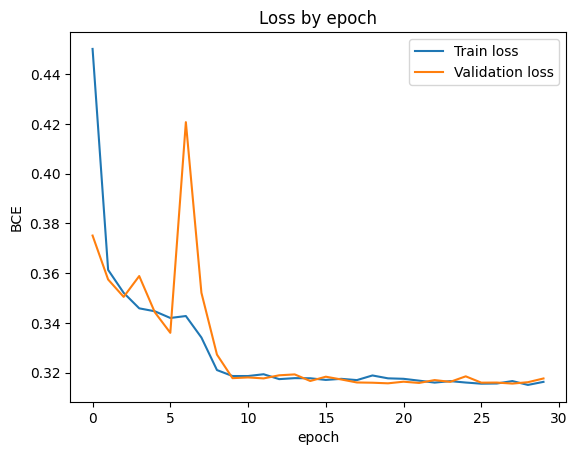

In [116]:
import matplotlib.pyplot as plt
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

## <u> Punto b </u>

Ahora voy a crear la red neuronal con 'user_id' y 'product_id' como embeddings

In [117]:
print('user_id: ', len(user_id.unique()))
print('product_id: ', len(product_id.unique()))

user_id:  5891
product_id:  3631


In [118]:
user_num_embeddings = len(user_id.unique())
product_num_embeddings = len(product_id.unique())

In [119]:
# Transformo vendor id a indices (idx) consecutivos para utilizar embeddings
user_id_to_idx = {value:i for i,value in enumerate(user_id.unique())}
product_id_to_idx = {value:i for i,value in enumerate(product_id.unique())}

# Vector de user_idx en el dataset
user_idx = np.array([user_id_to_idx[value] for value in user_id])
# Vector de product_idx en el dataset
product_idx = np.array([product_id_to_idx[value] for value in product_id])

In [120]:
# Divido el vector user_id en entrenamiento y validación
user_idx_train = user_idx[train_idx]
user_idx_valid = user_idx[valid_idx]
user_idx_test = user_idx[test_idx]

# Divido el vector vendor_idx en entrenamiento y validación
product_idx_train = product_idx[train_idx]
product_idx_valid = product_idx[valid_idx]
product_idx_test = product_idx[test_idx]

In [121]:
# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbddings(Dataset):

  def __init__(self, x, vendor_idx,product_idx, y):
    self.x = x
    self.user_idx = user_idx
    self.product_idx = product_idx
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.user_idx[idx], self.product_idx[idx], self.y[idx]

In [122]:
# Creo el dataset de entrenamiento
train_ds_embeddings = MyDatasetWithEmbddings(train_x, user_idx_train, product_idx_train, train_y)
valid_ds_embeddings = MyDatasetWithEmbddings(valid_x, user_idx_valid, product_idx_valid, valid_y)
test_ds_embeddings = MyDatasetWithEmbddings(test_x, user_idx_test, product_idx_test, test_y)

# Creo los DataLoader para entregar los dataset de a batches
train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size = 1024, shuffle= True)
valid_dataloader_emb = DataLoader(valid_ds_embeddings, batch_size = 1024)
test_dataloader_emb = DataLoader(test_ds_embeddings, batch_size = 1024)

In [123]:
# Arquitectura con embeddings
class NNetWithEmbeddings(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.dropout = torch.nn.Dropout(0.2)
    self.embeddings = torch.nn.Embedding(num_embeddings=user_num_embeddings, embedding_dim=16)
    self.embeddings2 = torch.nn.Embedding(num_embeddings=product_num_embeddings, embedding_dim=16)
    self.linear_1 = torch.nn.Linear(in_features= in_features+16+16, out_features=50, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 50, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features = 100, out_features= 50, bias=True)
    self.relu_3 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 50, out_features= 1, bias=True)

  def forward(self, x, user_idx, product_idx):
    embeddings_outputs = self.embeddings(user_idx)
    embeddings_outputs2 = self.embeddings2(product_idx)
    x = torch.cat([x, embeddings_outputs, embeddings_outputs2], dim=1)
    x = self.linear_1(x)
    x = self.dropout(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    x = self.relu_3(x)
    x = self.output(x)
    return x

In [124]:
nnnetWithEmbeddings = NNetWithEmbeddings()
nnnetWithEmbeddings = nnnetWithEmbeddings.to(device)

In [125]:
# De la misma manera que antes defino la 'loss_function' y el 'Optimizador'
loss_function_WithEmbddings = torch.nn.BCEWithLogitsLoss(reduction='sum')
# Optimizador con regularización L2 (parámetro weight_decay)
optimizer_WithEmbddings = torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr=0.001, weight_decay=0.0001)

 Utilizo como base de iteración del entrenamiento y validación el código visto en clase

In [126]:
# cantidad de epochs
epochs = 30

train_loss_by_epoch_WithEmbddings=[]
valid_loss_by_epoch_WithEmbddings=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):

  ############################################
  ## Entrenamiento
  ############################################
  nnnetWithEmbeddings.train(True)

  epoch_loss_WithEmbddings = 0
  epoch_y_hat_WithEmbddings = []
  epoch_y_WithEmbddings = []

  for i,data in enumerate(train_dataloader_emb):
    # Obtengo los datos del batch de entrenamiento
    x_batch_WithEmbddings, embed_batch_user, embed_batch_prod, y_batch_WithEmbddings = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch_WithEmbddings = x_batch_WithEmbddings.to(device).float()
    embed_batch_user = embed_batch_user.to(device).int()
    embed_batch_prod = embed_batch_prod.to(device).int()
    y_batch_WithEmbddings = y_batch_WithEmbddings.to(device).float().reshape(-1, 1)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer_WithEmbddings.zero_grad()
    nnet_output_WithEmbddings = nnnetWithEmbeddings(x_batch_WithEmbddings, embed_batch_user, embed_batch_prod)
    y_batch_hat_WithEmbddings = torch.sigmoid(nnet_output_WithEmbddings)

    # Calculo el loss
    loss_WithEmbddings = loss_function_WithEmbddings(nnet_output_WithEmbddings, y_batch_WithEmbddings)

    # Backpropagation
    loss_WithEmbddings.backward()

    # Actualizar los parámetros
    optimizer_WithEmbddings.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y_WithEmbddings += list(y_batch_WithEmbddings.detach().cpu().numpy())
    epoch_y_hat_WithEmbddings += list(y_batch_hat_WithEmbddings.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss_WithEmbddings = epoch_loss_WithEmbddings + loss_WithEmbddings.item()

  # Calculo la media de la loss
  epoch_loss_WithEmbddings = epoch_loss_WithEmbddings / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch_WithEmbddings.append(epoch_loss_WithEmbddings)
  # Cálculo la métrica de la epoch
  accuracy_WithEmbddings = metrics.accuracy_score(epoch_y_WithEmbddings, [j>=0.5 for j in epoch_y_hat_WithEmbddings])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnnetWithEmbeddings.train(False)

  valid_epoch_loss_WithEmbddings = 0
  valid_epoch_y_hat_WithEmbddings = []
  valid_epoch_y_WithEmbddings = []

  for i,data in enumerate(valid_dataloader_emb):
    # Obtengo los datos del batch de validación
    x_batch_WithEmbddings, embed_batch_user, embed_batch_prod, y_batch_WithEmbddings = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch_WithEmbddings = x_batch_WithEmbddings.to(device).float()
    embed_batch_user = embed_batch_user.to(device).int()
    embed_batch_prod = embed_batch_prod.to(device).int()
    y_batch_WithEmbddings = y_batch_WithEmbddings.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output_WithEmbddings = nnnetWithEmbeddings(x_batch_WithEmbddings, embed_batch_user, embed_batch_prod)
    y_batch_hat_WithEmbddings = torch.sigmoid(nnet_output_WithEmbddings)

    # Calculo el loss
    loss_WithEmbddings = loss_function_WithEmbddings(nnet_output_WithEmbddings, y_batch_WithEmbddings)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y_WithEmbddings += list(y_batch_WithEmbddings.detach().cpu().numpy())
    valid_epoch_y_hat_WithEmbddings += list(y_batch_hat_WithEmbddings.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss_WithEmbddings = valid_epoch_loss_WithEmbddings + loss_WithEmbddings.item()

  # Calculo la media de la loss
  valid_epoch_loss_WithEmbddings = valid_epoch_loss_WithEmbddings / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch_WithEmbddings.append(valid_epoch_loss_WithEmbddings)
  # Cálculo la métrica de la epoch
  valid_accuracy_WithEmbddings = metrics.accuracy_score(valid_epoch_y_WithEmbddings, [j>=0.5 for j in valid_epoch_y_hat_WithEmbddings])

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss_WithEmbddings:.3f} / {valid_epoch_loss_WithEmbddings:.3f} | " \
        f"Train/Valid accuracy: {accuracy_WithEmbddings:.3f} / {valid_accuracy_WithEmbddings:.3f}")

 Epoch 0 | Train/Valid loss: 0.534 / 0.403 | Train/Valid accuracy: 0.733 / 0.827
 Epoch 1 | Train/Valid loss: 0.369 / 0.325 | Train/Valid accuracy: 0.842 / 0.860
 Epoch 2 | Train/Valid loss: 0.320 / 0.303 | Train/Valid accuracy: 0.859 / 0.867
 Epoch 3 | Train/Valid loss: 0.302 / 0.294 | Train/Valid accuracy: 0.865 / 0.870
 Epoch 4 | Train/Valid loss: 0.294 / 0.291 | Train/Valid accuracy: 0.868 / 0.870
 Epoch 5 | Train/Valid loss: 0.288 / 0.288 | Train/Valid accuracy: 0.870 / 0.872
 Epoch 6 | Train/Valid loss: 0.285 / 0.287 | Train/Valid accuracy: 0.871 / 0.872
 Epoch 7 | Train/Valid loss: 0.283 / 0.289 | Train/Valid accuracy: 0.872 / 0.871
 Epoch 8 | Train/Valid loss: 0.281 / 0.289 | Train/Valid accuracy: 0.872 / 0.871
 Epoch 9 | Train/Valid loss: 0.279 / 0.286 | Train/Valid accuracy: 0.873 / 0.872
 Epoch 10 | Train/Valid loss: 0.278 / 0.286 | Train/Valid accuracy: 0.874 / 0.872
 Epoch 11 | Train/Valid loss: 0.277 / 0.286 | Train/Valid accuracy: 0.874 / 0.872
 Epoch 12 | Train/Valid lo

In [127]:
nnnetWithEmbeddings.train(False)

test_y_hat_WithEmbddings = []
test_y_WithEmbddings = []

for i,data in enumerate(test_dataloader_emb):
  # Obtengo los datos del batch de validación
  x_batch_WithEmbddings, embed_batch_user, embed_batch_prod, y_batch_WithEmbddings = data
  # Copio el batch al dispositivo donde entreno la red neuronal
  x_batch_WithEmbddings = x_batch_WithEmbddings.to(device).float()
  embed_batch_user = embed_batch_user.to(device).int()
  embed_batch_prod = embed_batch_prod.to(device).int()
  y_batch_WithEmbddings = y_batch_WithEmbddings.to(device).float().reshape(-1, 1)

  # Paso forward
  nnet_output_WithEmbddings = nnnetWithEmbeddings(x_batch_WithEmbddings, embed_batch_user, embed_batch_prod)
  y_batch_hat_WithEmbddings = torch.sigmoid(nnet_output_WithEmbddings)

  # Calculo el loss
  loss_WithEmbddings = loss_function_WithEmbddings(nnet_output_WithEmbddings, y_batch_WithEmbddings)

  # En validación no hago backpropagation!!

  # Almaceno los valores reales y mis predicciones para cálcular las métricas
  test_y_WithEmbddings += list(y_batch_WithEmbddings.detach().cpu().numpy())
  test_y_hat_WithEmbddings += list(y_batch_hat_WithEmbddings.detach().cpu().numpy())


# Cálculo la métrica
test_accuracy_WithEmbddings = metrics.accuracy_score(test_y_WithEmbddings, [j>=0.5 for j in test_y_hat_WithEmbddings])

print(f'test_accuracy_WithEmbddings:  {test_accuracy_WithEmbddings:.2%}')

test_accuracy_WithEmbddings:  53.65%


Text(0, 0.5, 'BCE')

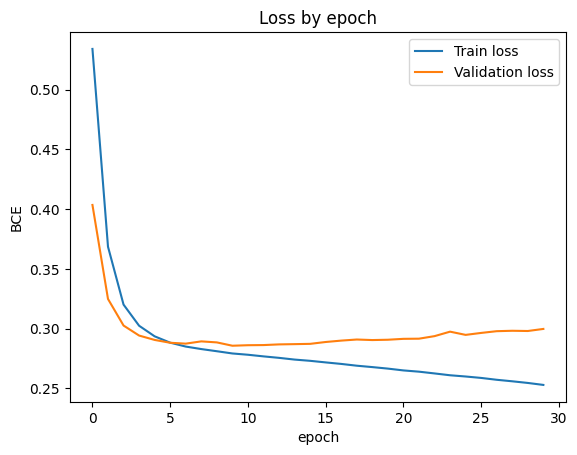

In [128]:
import matplotlib.pyplot as plt
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch_WithEmbddings, label="Train loss")
ax1.plot(valid_loss_by_epoch_WithEmbddings, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

Se puede ver que utilizando los embedding indicados las métricas en el set de entrenamiento mejoraron pero no así el de validación incluso se puede ver que accuracy de set de prueba empeoro mucho.

<u> Punto c </u> : (grafico de BCE en función de las épocas)

En la gráfica se puede ver que si bien la perdida mejora para el set de entrenamiento a lo largo de las épocas no es así para el set de validación, se ve que se estabilizo en un valor similar al modelo sin embedding. Es posible que esto se deba a que el modelo está en overfitting cuando se utiliza estos embeddings

Para mejorar los resultados probe varias alternativas como modificar la arquitectura de la red neuronal, colocar una cala de 'dropout', modificar la codificación de los datos de entrada e incluso reducir la cantidad de features pero no conseguí obtener mejores que los mostrados.

Tambien probe, como se puede ver a continuacion, entrenar la red con solo una capa de embedding utilizadon el 'product_id', pero de la misma manera los resultados no fueron mejores.

In [129]:
# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbddings2(Dataset):

  def __init__(self, x, user_idx, y):
    self.x = x
    self.product_idx = product_idx
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.product_idx[idx], self.y[idx]

In [130]:
train_ds_embeddings2 = MyDatasetWithEmbddings2(train_x, product_idx_train, train_y)
valid_ds_embeddings2 = MyDatasetWithEmbddings2(valid_x, product_idx_train, valid_y)
test_ds_embeddings2 = MyDatasetWithEmbddings2(test_x, product_idx_train, test_y)

train_dataloader_emb2 = DataLoader(train_ds_embeddings2, batch_size = 1024, shuffle= True)
valid_dataloader_emb2 = DataLoader(valid_ds_embeddings2, batch_size = 1024)
test_dataloader_emb2 = DataLoader(test_ds_embeddings2, batch_size = 1024)

In [131]:
# Arquitectura con embeddings
class NNetWithEmbeddings2(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.embeddings = torch.nn.Embedding(num_embeddings=product_num_embeddings, embedding_dim=16)
    self.linear_1 = torch.nn.Linear(in_features=in_features+16, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 100, out_features= 1, bias=True)

  def forward(self, x, product_idx):
    embeddings_outputs = self.embeddings(product_idx)
    x = torch.cat([x, embeddings_outputs], dim=1)
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [132]:
nnnetWithEmbeddings2 = NNetWithEmbeddings2()
nnnetWithEmbeddings2 = nnnetWithEmbeddings2.to(device)

In [133]:
loss_function_WithEmbddings2 = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer_WithEmbddings2 = torch.optim.Adam(nnnetWithEmbeddings2.parameters(), lr=0.001, weight_decay=0.0001)

In [134]:
# cantidad de epochs
epochs = 30

train_loss_by_epoch_WithEmbddings2=[]
valid_loss_by_epoch_WithEmbddings2=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):

  ############################################
  ## Entrenamiento
  ############################################
  nnnetWithEmbeddings2.train(True)

  epoch_loss_WithEmbddings2 = 0
  epoch_y_hat_WithEmbddings2 = []
  epoch_y_WithEmbddings2 = []

  for i,data in enumerate(train_dataloader_emb2):
    # Obtengo los datos del batch de entrenamiento
    x_batch_WithEmbddings2, embed_batch_product, y_batch_WithEmbddings2 = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch_WithEmbddings2 = x_batch_WithEmbddings2.to(device).float()
    embed_batch_product = embed_batch_product.to(device).int()
    y_batch_WithEmbddings2 = y_batch_WithEmbddings2.to(device).float().reshape(-1, 1)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer_WithEmbddings2.zero_grad()
    nnet_output_WithEmbddings2 = nnnetWithEmbeddings2(x_batch_WithEmbddings2, embed_batch_product)
    y_batch_hat_WithEmbddings2 = torch.sigmoid(nnet_output_WithEmbddings2)

    # Calculo el loss
    loss_WithEmbddings2 = loss_function_WithEmbddings2(nnet_output_WithEmbddings2, y_batch_WithEmbddings2)

    # Backpropagation
    loss_WithEmbddings2.backward()

    # Actualizar los parámetros
    optimizer_WithEmbddings2.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y_WithEmbddings2 += list(y_batch_WithEmbddings2.detach().cpu().numpy())
    epoch_y_hat_WithEmbddings2 += list(y_batch_hat_WithEmbddings2.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss_WithEmbddings2 = epoch_loss_WithEmbddings2 + loss_WithEmbddings2.item()

  # Calculo la media de la loss
  epoch_loss_WithEmbddings2 = epoch_loss_WithEmbddings2 / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch_WithEmbddings2.append(epoch_loss_WithEmbddings2)
  # Cálculo la métrica de la epoch
  accuracy_WithEmbddings2 = metrics.accuracy_score(epoch_y_WithEmbddings2, [j>=0.5 for j in epoch_y_hat_WithEmbddings2])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnnetWithEmbeddings2.train(False)

  valid_epoch_loss_WithEmbddings2 = 0
  valid_epoch_y_hat_WithEmbddings2 = []
  valid_epoch_y_WithEmbddings2 = []

  for i,data in enumerate(valid_dataloader_emb2):
    # Obtengo los datos del batch de validación
    x_batch_WithEmbddings2, embed_batch_product, y_batch_WithEmbddings2 = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch_WithEmbddings2 = x_batch_WithEmbddings2.to(device).float()
    embed_batch_product = embed_batch_product.to(device).int()
    y_batch_WithEmbddings2 = y_batch_WithEmbddings2.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output_WithEmbddings2 = nnnetWithEmbeddings2(x_batch_WithEmbddings2, embed_batch_product)
    y_batch_hat_WithEmbddings2 = torch.sigmoid(nnet_output_WithEmbddings2)

    # Calculo el loss
    loss_WithEmbddings2 = loss_function_WithEmbddings2(nnet_output_WithEmbddings2, y_batch_WithEmbddings2)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y_WithEmbddings2 += list(y_batch_WithEmbddings2.detach().cpu().numpy())
    valid_epoch_y_hat_WithEmbddings2 += list(y_batch_hat_WithEmbddings2.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss_WithEmbddings2 = valid_epoch_loss_WithEmbddings2 + loss_WithEmbddings2.item()

  # Calculo la media de la loss
  valid_epoch_loss_WithEmbddings2 = valid_epoch_loss_WithEmbddings2 / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch_WithEmbddings2.append(valid_epoch_loss_WithEmbddings2)
  # Cálculo la métrica de la epoch
  valid_accuracy_WithEmbddings2 = metrics.accuracy_score(valid_epoch_y_WithEmbddings2, [j>=0.5 for j in valid_epoch_y_hat_WithEmbddings2])

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss_WithEmbddings2:.3f} / {valid_epoch_loss_WithEmbddings2:.3f} | " \
        f"Train/Valid accuracy: {accuracy_WithEmbddings2:.3f} / {valid_accuracy_WithEmbddings2:.3f}")

 Epoch 0 | Train/Valid loss: 0.568 / 0.492 | Train/Valid accuracy: 0.731 / 0.781
 Epoch 1 | Train/Valid loss: 0.489 / 0.486 | Train/Valid accuracy: 0.780 / 0.778
 Epoch 2 | Train/Valid loss: 0.476 / 0.470 | Train/Valid accuracy: 0.784 / 0.793
 Epoch 3 | Train/Valid loss: 0.453 / 0.439 | Train/Valid accuracy: 0.788 / 0.787
 Epoch 4 | Train/Valid loss: 0.424 / 0.417 | Train/Valid accuracy: 0.792 / 0.799
 Epoch 5 | Train/Valid loss: 0.401 / 0.395 | Train/Valid accuracy: 0.813 / 0.822
 Epoch 6 | Train/Valid loss: 0.387 / 0.384 | Train/Valid accuracy: 0.828 / 0.831
 Epoch 7 | Train/Valid loss: 0.375 / 0.373 | Train/Valid accuracy: 0.838 / 0.842
 Epoch 8 | Train/Valid loss: 0.365 / 0.364 | Train/Valid accuracy: 0.843 / 0.846
 Epoch 9 | Train/Valid loss: 0.358 / 0.360 | Train/Valid accuracy: 0.847 / 0.846
 Epoch 10 | Train/Valid loss: 0.352 / 0.353 | Train/Valid accuracy: 0.849 / 0.851
 Epoch 11 | Train/Valid loss: 0.348 / 0.355 | Train/Valid accuracy: 0.851 / 0.851
 Epoch 12 | Train/Valid lo

Usando solo el embedding de 'product_id' tampoco se consigue mejorar las metricas.

In [135]:
  print('Modelo sin embedding\n' \
      f"Train loss: {epoch_loss:.3f}\n" \
        f"Valid loss: {valid_epoch_loss:.3f}\n" \
        f"Train accuracy: {accuracy:.2%}\n" \
        f"Valid accuracy: {valid_accuracy:.2%}\n" \
        f'test_accuracy:  {test_accuracy:.2%}\n\n')

  print('Modelo con embedding\n' \
      f"Train loss: {epoch_loss_WithEmbddings:.3f}\n" \
        f"Valid loss: {valid_epoch_loss_WithEmbddings:.3f}\n" \
        f"Train accuracy: {accuracy_WithEmbddings:.2%}\n" \
        f"Valid accuracy: {valid_accuracy_WithEmbddings:.2%}\n" \
        f'test_accuracy:  {test_accuracy_WithEmbddings:.2%}\n\n')

Modelo sin embedding
Train loss: 0.316
Valid loss: 0.318
Train accuracy: 86.41%
Valid accuracy: 86.41%
test_accuracy:  86.41%


Modelo con embedding
Train loss: 0.253
Valid loss: 0.300
Train accuracy: 88.42%
Valid accuracy: 86.58%
test_accuracy:  53.65%




## <u> Punto d </u>

Comparo las metricas de los modelos entrenados.

Como ya se menciono anteriormente en el modelo con embeddings se mejoro solo las metricas del set de entrenamiento pero se empeoro bastante en le de prueba. Las metricas del set de validacion no tuvieron mayores cambios
